In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [17]:
df1 = pd.read_csv('MortgageDeqlncy2to5anlaysis.csv')


In [18]:
df1.describe(include ='all')

,Loan Number,credit_score,first_time_homebuyer_flag,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,property_type,ln_purpose,borrower_cnt,seller_name,curr_ln_delq_stas
count,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428,4428.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other sellers,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2190,NaN
mean,2214.500000,762.573622,0.114047,4.647471,1.018293,1.995483,73.491192,31.958220,217312.556459,72.391599,4.072042,3.597335,2.192638,1.591238,NaN,0.469964
std,1278.397825,39.518410,0.317904,10.254836,0.168383,0.305772,15.234472,10.049452,115790.382002,15.481599,0.258586,0.818116,0.754578,0.491661,NaN,7.375455
min,1.000000,605.000000,0.000000,0.000000,1.000000,1.000000,13.000000,0.000000,25000.000000,13.000000,4.000000,1.000000,1.000000,1.000000,NaN,0.000000
25%,1107.750000,737.000000,0.000000,0.000000,1.000000,2.000000,66.000000,24.000000,127000.000000,64.000000,4.000000,3.000000,2.000000,1.000000,NaN,0.000000
50%,2214.500000,772.000000,0.000000,0.000000,1.000000,2.000000,78.000000,33.000000,193000.000000,77.000000,4.000000,4.000000,2.000000,2.000000,NaN,0.000000
75%,3321.250000,794.000000,0.000000,0.000000,1.000000,2.000000,80.000000,40.000000,289000.000000,80.000000,4.000000,4.000000,3.000000,2.000000,NaN,0.000000


Text(0.5, 1.0, 'Correlation matrix')

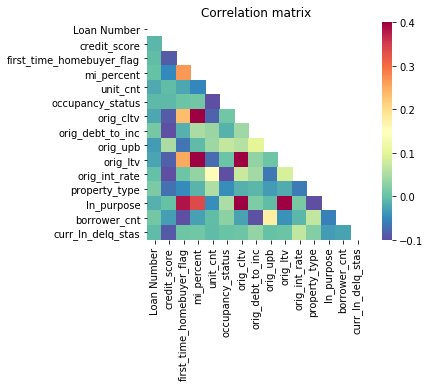

In [19]:
corrs = df1.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.4)
plt.title('Correlation matrix')

In [20]:
df1.corr()

,Loan Number,credit_score,first_time_homebuyer_flag,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,property_type,ln_purpose,borrower_cnt,curr_ln_delq_stas
Loan Number,1.000000,-0.008831,-0.002495,0.000494,-0.020617,-0.007145,-0.022999,0.011381,-0.033204,-0.024902,-0.000709,0.015948,-0.015828,0.010811,-0.005060
credit_score,-0.008831,1.000000,-0.088241,-0.048066,-0.002833,-0.007188,-0.088195,-0.130594,0.048511,-0.083392,-0.190477,-0.070268,0.001528,-0.030085,-0.088631
first_time_homebuyer_flag,-0.002495,-0.088241,1.000000,0.265518,-0.022103,0.005300,0.234181,-0.014488,-0.065077,0.252487,0.007197,-0.046600,0.383928,-0.100550,0.007097
mi_percent,0.000494,-0.048066,0.265518,1.000000,-0.049245,0.009289,0.557836,0.048817,-0.005387,0.581127,0.034027,-0.011539,0.336308,-0.027915,0.008060
unit_cnt,-0.020617,-0.002833,-0.022103,-0.049245,1.000000,-0.173885,-0.080994,0.037962,0.040059,-0.073803,0.156489,0.053482,-0.043741,-0.002429,-0.004923
occupancy_status,-0.007145,-0.007188,0.005300,0.009289,-0.173885,1.000000,0.007556,-0.013146,0.070258,0.004621,-0.301567,-0.045197,0.050765,0.028285,0.003345
orig_cltv,-0.022999,-0.088195,0.234181,0.557836,-0.080994,0.007556,1.000000,0.040648,0.059554,0.956263,0.075477,-0.014231,0.418306,-0.026537,0.006449
orig_debt_to_inc,0.011381,-0.130594,-0.014488,0.048817,0.037962,-0.013146,0.040648,1.000000,0.100106,0.032582,0.043925,-0.009135,0.018100,-0.097910,0.034520
orig_upb,-0.033204,0.048511,-0.065077,-0.005387,0.040059,0.070258,0.059554,0.100106,1.000000,0.005503,-0.063663,-0.033333,-0.003365,0.176928,0.000199
orig_ltv,-0.024902,-0.083392,0.252487,0.581127,-0.073803,0.004621,0.956263,0.032582,0.005503,1.000000,0.089381,-0.018865,0.424970,-0.040663,0.004485


In [21]:
df1.dtypes

Loan Number                   int64
credit_score                  int64
first_time_homebuyer_flag     int64
mi_percent                    int64
unit_cnt                      int64
occupancy_status              int64
orig_cltv                     int64
orig_debt_to_inc              int64
orig_upb                      int64
orig_ltv                      int64
orig_int_rate                 int64
property_type                 int64
ln_purpose                    int64
borrower_cnt                  int64
seller_name                  object
curr_ln_delq_stas             int64
dtype: object

In [22]:
df = df1.drop(['seller_name'], axis =1)

In [32]:
array = df.values
x = array[:,0:16]
y= array[:,14]

In [33]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)
np.set_printoptions(precision =3)
print(fit.scores_)
features = fit.transform(x)
print(features[0:16,:])

[2.389e+04 3.091e+02 2.938e+01 1.184e+03 2.217e-01 1.335e+00 9.878e+01
 1.563e+02 2.533e+06 1.095e+02 1.783e+00 3.341e+00 1.296e+01 7.534e+00
 5.124e+05]
[[     1      0 300000      0]
 [     2     30 263000      0]
 [     3     12 169000      0]
 [     4      0 357000      0]
 [     5      0 417000      0]
 [     6     25 150000      0]
 [     7      0 409000      0]
 [     8      0 400000      0]
 [     9      0 352000      0]
 [    10      0  83000      0]
 [    11      0  90000      0]
 [    12      0 237000      0]
 [    13      0 101000      0]
 [    14      0 129000      0]
 [    15     30 234000      0]
 [    16     30 218000      0]]


In [36]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x,y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Feautres: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

Num Features: 3
Selected Feautres: [False False False False False  True False False False False  True False
 False False  True]
Feature Ranking: [12 11  6  7  5  1  8 10 13  9  1  4  3  2  1]


C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
